In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
pops = pd.read_csv('co-est2019-alldata.csv')[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2019']]

In [3]:
pops = pops[pops['COUNTY'] != 0]

In [4]:
pops.sort_values('POPESTIMATE2019')

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019
560,15,5,Hawaii,Kalawao County,86
2717,48,301,Texas,Loving County,169
2701,48,269,Texas,King County,272
2697,48,261,Texas,Kenedy County,404
1684,31,5,Nebraska,Arthur County,463
...,...,...,...,...,...
227,6,73,California,San Diego County,3338330
106,4,13,Arizona,Maricopa County,4485414
2667,48,201,Texas,Harris County,4713325
624,17,31,Illinois,Cook County,5150233


In [5]:
# Cancer Rate
p = 0.005

In [6]:
# Simulating for Kalawao County
binom.rvs(n = 86, p = p)

0

In [7]:
binom.rvs(n = 169, p = p)

0

In [8]:
binom.rvs(n = 272, p = p)

1

In [9]:
pops['cancer_instances'] = pops['POPESTIMATE2019'].apply(lambda x: binom.rvs(n = x, p = p))

In [11]:
pops.sort_values('POPESTIMATE2019')

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,cancer_instances
560,15,5,Hawaii,Kalawao County,86,0
2717,48,301,Texas,Loving County,169,0
2701,48,269,Texas,King County,272,1
2697,48,261,Texas,Kenedy County,404,1
1684,31,5,Nebraska,Arthur County,463,0
...,...,...,...,...,...,...
227,6,73,California,San Diego County,3338330,16769
106,4,13,Arizona,Maricopa County,4485414,22236
2667,48,201,Texas,Harris County,4713325,23786
624,17,31,Illinois,Cook County,5150233,25498


In [15]:
pops['cancer_rate'] = pops['cancer_instances'] / pops['POPESTIMATE2019'] * 100000

In [16]:
pops.sort_values('POPESTIMATE2019')

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,cancer_instances,cancer_rate
560,15,5,Hawaii,Kalawao County,86,0,0.000000
2717,48,301,Texas,Loving County,169,0,0.000000
2701,48,269,Texas,King County,272,1,367.647059
2697,48,261,Texas,Kenedy County,404,1,247.524752
1684,31,5,Nebraska,Arthur County,463,0,0.000000
...,...,...,...,...,...,...,...
227,6,73,California,San Diego County,3338330,16769,502.317027
106,4,13,Arizona,Maricopa County,4485414,22236,495.740193
2667,48,201,Texas,Harris County,4713325,23786,504.654358
624,17,31,Illinois,Cook County,5150233,25498,495.084397


In [17]:
pops.nlargest(25, 'cancer_rate')

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,cancer_instances,cancer_rate
1685,31,7,Nebraska,Banner County,745,12,1610.738255
73,2,60,Alaska,Bristol Bay Borough,836,9,1076.555024
1767,31,171,Nebraska,Thomas County,722,7,969.529086
2644,48,155,Texas,Foard County,1155,11,952.380952
279,8,57,Colorado,Jackson County,1392,13,933.908046
2180,40,25,Oklahoma,Cimarron County,2137,19,889.096865
2072,38,95,North Dakota,Towner County,2189,19,867.976245
1686,31,9,Nebraska,Blaine County,465,4,860.215054
281,8,61,Colorado,Kiowa County,1406,12,853.485064
1749,31,135,Nebraska,Perkins County,2891,24,830.162574


In [18]:
pops.nsmallest(25, 'cancer_rate')

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,cancer_instances,cancer_rate
560,15,5,Hawaii,Kalawao County,86,0,0.000000
1684,31,5,Nebraska,Arthur County,463,0,0.000000
2717,48,301,Texas,Loving County,169,0,0.000000
2048,38,47,North Dakota,Logan County,1850,2,108.108108
2450,46,95,South Dakota,Mellette County,2061,4,194.080543
1659,30,69,Montana,Petroleum County,487,1,205.338809
2413,46,21,South Dakota,Campbell County,1376,3,218.023256
1780,32,9,Nevada,Esmeralda County,873,2,229.095074
2437,46,69,South Dakota,Hyde County,1301,3,230.591852
2885,51,36,Virginia,Charles City County,6963,17,244.147638


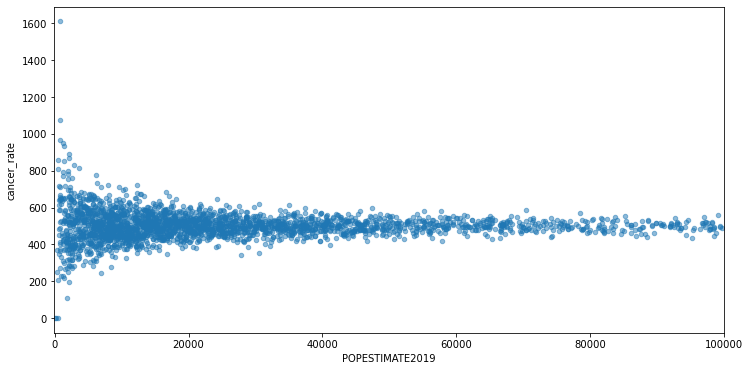

In [24]:
pops.plot(kind = 'scatter',
         x = 'POPESTIMATE2019',
         y = 'cancer_rate',
         figsize = (12,6),
         alpha = 0.5)

plt.xlim(-100, 100000);

In [25]:
# Standard Deviation for Kalawao County

np.sqrt(p*(1-p) / 86)

0.00760584230768048

In [26]:
# Standard Deviation for Los Angeles County
np.sqrt(p*(1-p) / 10039107)

2.226122201642237e-05